**COVID19 CT Pneumonia Detection**
with Transfer Learning: An implementation in Tensorflow and Keras

In [38]:
from numpy.random import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7) #2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [39]:
print(os.listdir("D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/source"))

['source data list.txt', 'test', 'train']


In [40]:
from os import listdir
data_list = listdir('D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/source/train')

data_list

['normal', 'pneumonia']

In [41]:
train_path = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/source/train'
test_path = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/source/test'

Case 1: COVID vs Normal
VGG Initialization

In [42]:
import numpy as np
import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import *
%matplotlib inline

In [43]:
from keras.metrics import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
IMAGE_SIZE    = (150, 150) 
BATCH_SIZE    = 30
NUM_EPOCHS    = 10
LEARNING_RATE = 0.0005

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')                                                 

train_batches = train_datagen.flow_from_directory(train_path,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="binary",
                                                 
                                                  )

valid_batches = train_datagen.flow_from_directory(train_path,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="binary",
                                                  
                                                 
                                                  )

test_batches = train_datagen.flow_from_directory(test_path, 
                                                 target_size=IMAGE_SIZE, 
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True,
                                                 seed=42,
                                                 class_mode="binary"
                                                )

C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 10734 images belonging to 2 classes.
Found 2683 images belonging to 2 classes.
Found 1479 images belonging to 2 classes.


Layer Modification at upper layer of VGG16

In [45]:
#Simple CNN model based on VGG16
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.normalization import BatchNormalization

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, trainable=True, activation='relu'))   #Rectified Linear Unit
model.add(layers.Dense(1, trainable=True, activation='sigmoid'))  #Sigmoid activation function


In [46]:
model.compile(loss='binary_crossentropy',
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

In [47]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [48]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,steps_per_epoch=10, validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID, epochs = NUM_EPOCHS
                           
                       )

358
90
Epoch 1/10


C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Admin\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 265s 27s/step - loss: 0.8665 - acc: 0.5667 - val_loss: 0.7337 - val_acc: 0.6082
Epoch 2/10
10/10 [==============================] - 249s 25s/step - loss: 0.5593 - acc: 0.7400 - val_loss: 0.5074 - val_acc: 0.7493
Epoch 3/10
10/10 [==============================] - 259s 26s/step - loss: 0.5059 - acc: 0.7600 - val_loss: 0.3607 - val_acc: 0.7787
Epoch 4/10
10/10 [==============================] - 260s 26s/step - loss: 0.4572 - acc: 0.7900 - val_loss: 0.4588 - val_acc: 0.7991
Epoch 5/10
10/10 [==============================] - 248s 25s/step - loss: 0.4156 - acc: 0.8133 - val_loss: 0.5028 - val_acc: 0.7995
Epoch 6/10
10/10 [==============================] - 248s 25s/step - loss: 0.4339 - acc: 0.8033 - val_loss: 0.5735 - val_acc: 0.8085
Epoch 7/10
10/10 [==============================] - 332s 33s/step - loss: 0.3765 - acc: 0.8233 - val_loss: 0.5290 - val_acc: 0.8127
Epoch 8/10
10/10 [==============================] - 297s 30s/step - loss: 0.4031 - acc:

Training

In [59]:
def plots (ims,figsize=(24,12), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
        for i in range(len(ims)):
            sp = f.add_subplot(20, 20, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[1], interpolation=None if interp else 'None')

In [60]:
test_imgs, test_labels = next(test_batches)

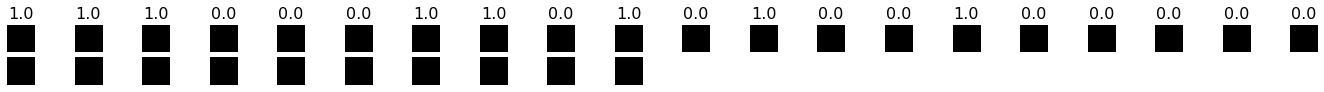

In [63]:
plots(test_imgs, titles = test_labels)

In [64]:
test_labels = test_labels
test_labels

array([1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [65]:
#count the total
j=0
y=0
for i in test_labels:
    if i == 0:
        j=j+1
    else:
        y=y+1
print('COVID19 Pneumonia:' ,j)    
print('Normal:',y)

COVID19 Pneumonia: 18
Normal: 12


Evaluation

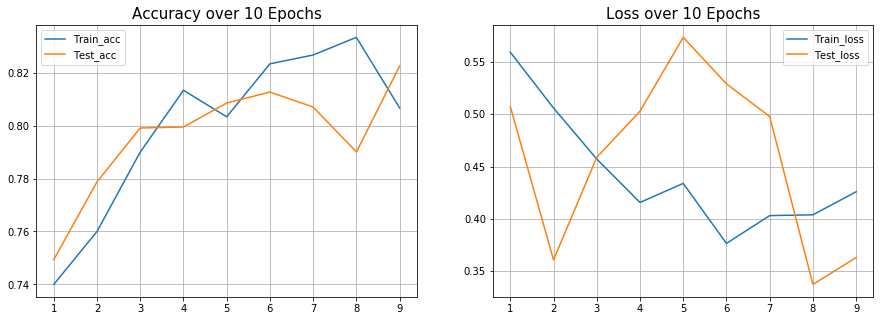

In [66]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, NUM_EPOCHS)

In [67]:
model.save('COVID-PNEUMONIA_VGG16_14896.h5')

In [124]:
#Dont forget shuffle false. Note that Shuffle False is necessary for predict generator due to Keras's internal shuffling.

test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_path,target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=False,
        seed=42,
        
        
        class_mode="binary")
eval_generator.reset()    



Found 1479 images belonging to 2 classes.


In [125]:

eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])



2/2 [==============================] - 4s 2s/step
Test loss: 0.13112930953502655
Test accuracy: 0.9333333373069763


Predict

In [126]:
eval_generator.reset()  
pred = model.predict_generator(test_batches, steps=1, verbose=1)
print("Predictions finished")

1/1 [==============================] - 2s 2s/step
Predictions finished


In [127]:
pred.round().tolist()

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [0.0],
 [1.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0]]

In [128]:
j=0
y=0
for i in pred:
    if i > 0.5:
        j=j+1
    else:
        y=y+1
print('COVID19 Pneumonia:' ,j)    
print('Normal:',y)

COVID19 Pneumonia: 9
Normal: 21


In [129]:
predictions = np.where(pred > 0.5, 1, 0)

In [130]:
predict = predictions[:,0]
predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1])

In [131]:
j=0
y=0
for i in pred:
    if i > 0.5:
        j=j+1
    else:
        y=y+1
print('COVID19 Pneumonia:' ,j)    
print('Normal:',y)

COVID19 Pneumonia: 9
Normal: 21


In [132]:
cm = confusion_matrix(test_labels, predict)

In [133]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[11  7]
 [10  2]]


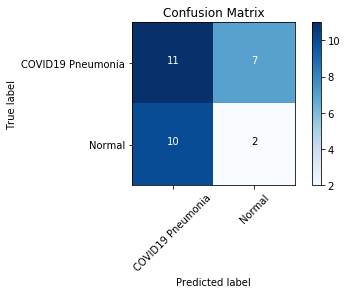

In [134]:
cm_plot_labels = ['COVID19 Pneumonia','Normal']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

normal\0088be53-27f2-4c30-882b-a73a3a5c8c71.png


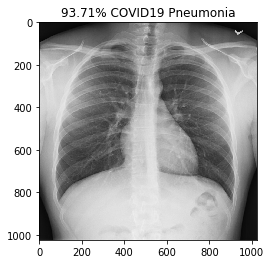

normal\009482dc-3db5-48d4-8580-5c89c4f01334.png


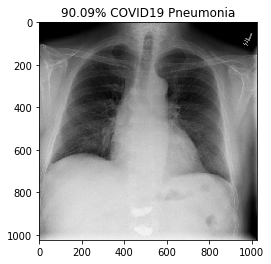

normal\00a85be6-6eb0-421d-8acf-ff2dc0007e8a.png


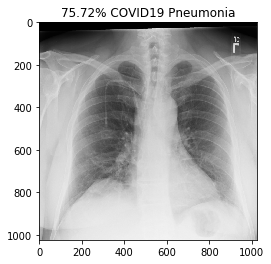

normal\00f87de5-5fe0-4921-93ea-914d7e683266.png


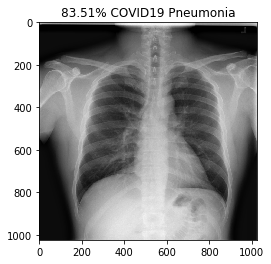

normal\0103fadb-1663-40a6-8a9e-09d626cd2091.png


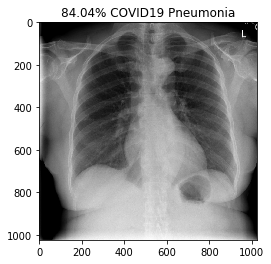

normal\0135d3e6-15d6-4491-a263-0bac7b7c2b47.png


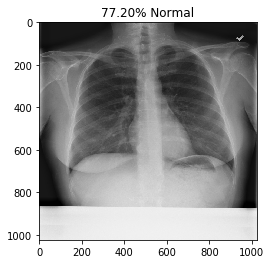

normal\01f11e57-5c11-4ab0-9312-d88c3826721c.png


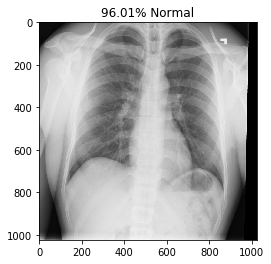

normal\029216c8-ea0d-47bb-88fd-bf611cc5d1fc.png


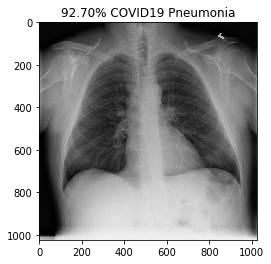

normal\029a7647-5a1b-45fd-bae0-35e4fa49f785.png


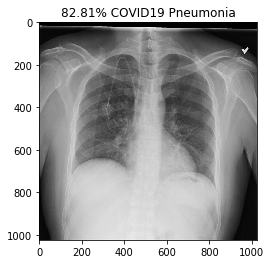

normal\02e4191e-fb03-4581-914c-f0438a17e53e.png


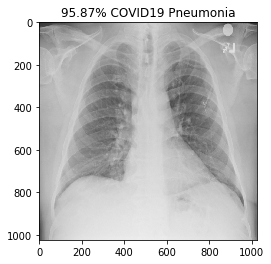

normal\03f43232-8362-4a4b-8632-aa336ce7ac08.png


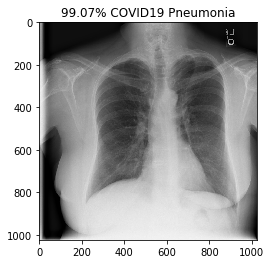

normal\050068ca-78f7-4394-b8de-6ebe347192e9.png


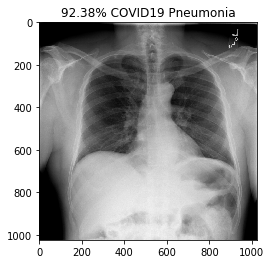

normal\0598a87e-6a8a-4439-a6ec-cd3395636b30.png


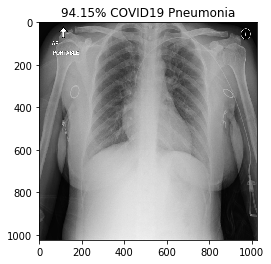

normal\05ad9fb7-7500-492a-a5db-d8e1c69855e5.png


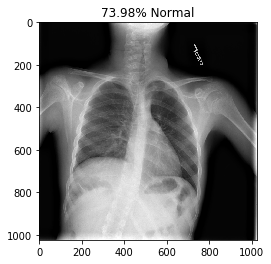

normal\065158ed-021d-4d2d-a2e2-79b69a03853d.png


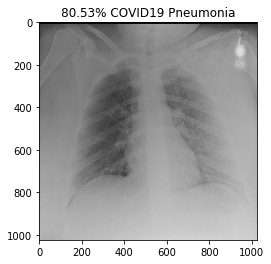

normal\0678ff6a-7402-4065-8566-be18d983fbbf.png


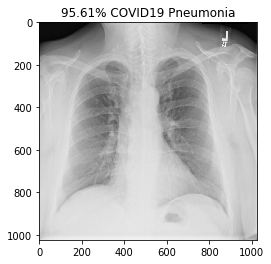

normal\069cfd47-0169-43e7-89a1-0be0fa24105b.png


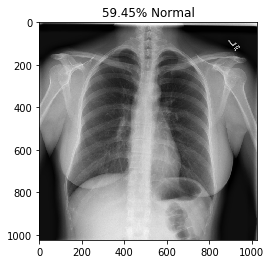

normal\06b2f933-3ea2-4477-ac27-18f732d1f4e1.png


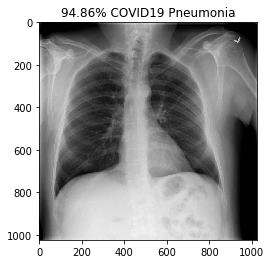

normal\07aeb82e-773b-4498-95c0-fabdf4985bb2.png


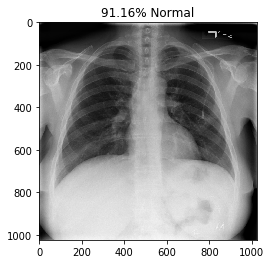

normal\07fc3068-9ae7-4ea4-958d-e6e6e49d5403.png


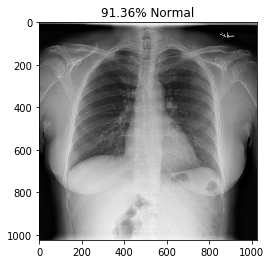

normal\0803b0fa-c026-40d3-b9b6-43b843d17632.png


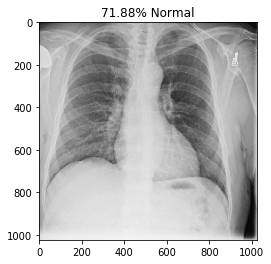

normal\087d375c-c266-4069-84dd-4d1d9d906539.png


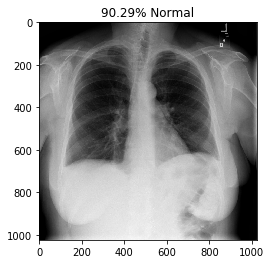

normal\08810d26-6674-4d73-91d5-ecdfdd0a0b42.png


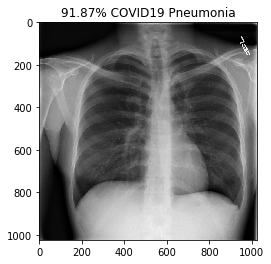

normal\08a74d38-bb50-4c38-9e41-7fd0976d428d.png


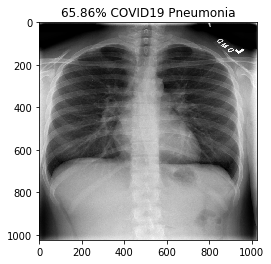

normal\08dd362a-d27b-47bd-a763-5e07f49f4584.png


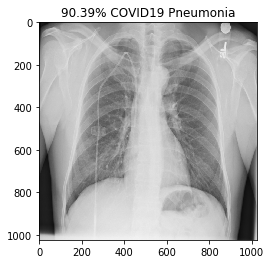

normal\0906b366-f454-4c62-88fc-caf7ffb5d36b.png


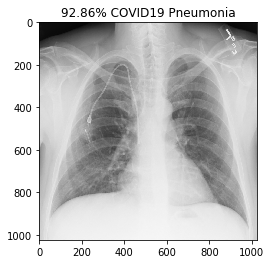

normal\0952761e-07c2-441a-bb1b-11bf1b5375c5.png


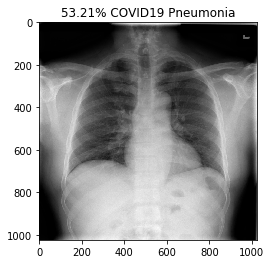

normal\0977f16c-c343-42c9-95ed-d7ca996feb16.png


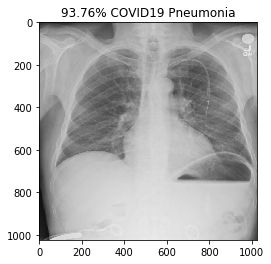

normal\097a2839-5587-4bf4-9adb-641d8caa877b.png


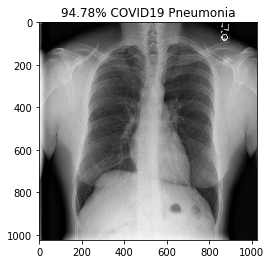

normal\0aa5abc0-7db8-44d4-b3b7-8133787e0862.png


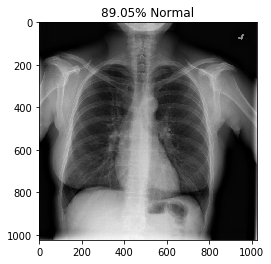

In [135]:
import cv2


import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    image_path = test_path + "/" + eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    #BGR TO RGB conversion using CV2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()